# Interpolación. Integración numérica: métodos del Trapacio y Simpson.

# Integración numérica. Área de curvas.

### Ejercicio 26.- Sabemos que el área delimitada por la curva $\rho=\rho(\theta)$ con $\theta \in [\theta_0,\theta_1]$, viene dada por la expresión
### $$
A=\dfrac{1}{2}\int_{\theta_0}^{\theta_1} \rho(\theta)^2 d\theta.
$$
### Usar esta fórmula para calcular el área delimitada por el interior de la cardiode $$\rho=a(1+\cos\theta), \theta\in [0,2\pi],$$ con $a=2$, utilizando el método de Simpson con $n=6$ parábolas.

SOLUCIÓN

Definimos la variable $\theta$ que representa a "angulo".

In [2]:
angulo=var('angulo')

Ahora dibujamos nuestra curva cardiode. Observamos la forma de corazón que tiene. Por esa razón, se llama cardioide.

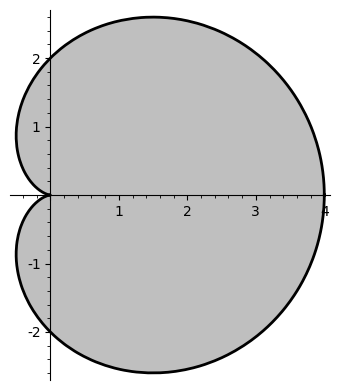

In [3]:
polar_plot(2*(1+cos(angulo)), (angulo,0,2*pi),color='black',thickness=2,fill=True)

Tenemos que buscar la función que vamos a integrar y si observamos el enunciado del problema nos dice que hay que calcular
$$f(\theta)=\dfrac{\rho(\theta)^2}{2}=\dfrac{a^2(1+\cos\theta))^2}{2}$$

In [4]:
f(angulo)=(2^2*(1+cos(angulo))^2)/2
show(f)

angulo |--> 2*(cos(angulo) + 1)^2

Al dibujarla vemos que es una función simétrica respecto del eje $x=\pi$ al igual que la cardioide es simétrica a partir de $\theta=\pi$

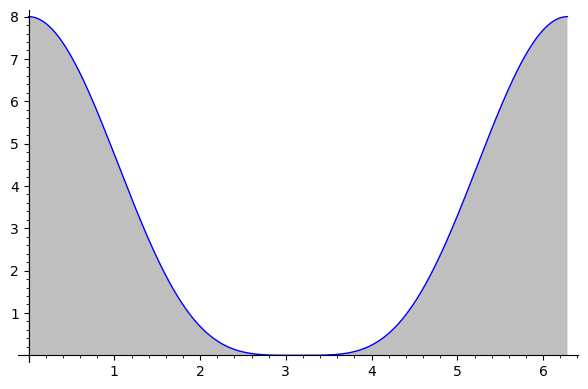

In [5]:
plot(f,0,2*pi,fill=True)

La siguiente integral nos da el área limitada por la cardiode:
 $$  A=\int_{0}^{2\pi} f(\theta) \, d\theta= \int_{0}^{2\pi} \dfrac{a^2(1+\cos\theta))^2}{2} \, d\theta=\dfrac{a^2}{2} \int_{0}^{2\pi} (1+\cos^2\theta+2\cos\theta) \, d\theta=$$
 $$ =\dfrac{a^2}{2} \int_{0}^{2\pi} (1+\dfrac{1+\cos2\theta}{2}+2\cos\theta) \, d\theta=\dfrac{a^2}{2}(\dfrac{6\theta+\sin2\theta+8\sin\theta}{4})|_{0}^{2\pi}$$
Para nuestro caso, $a=2$, obtenemos que 
$$  A=\dfrac{2^2}{2}(\dfrac{12\pi+\sin4\pi+8\sin2\pi}{4})-\dfrac{2^2}{2}(\dfrac{0+\sin0+8\sin0}{4})=6\pi$$
Por supuesto, se puede calcular la integral con sage:

In [6]:
int(angulo)=integral(f,angulo)
show(int)

angulo |--> 3*angulo + 1/2*sin(2*angulo) + 4*sin(angulo)

Y calcular el valor exacto con sage:

In [7]:
(int(2*pi)-int(0))

6*pi

In [8]:
numerical_integral(f,0,2*pi)[0] 

18.849555921538766

Después de estos preliminares comenzamos con la resolución del problema.

In [9]:
a=0
b=2*pi
n=6

In [10]:
X=[a+k*(b-a)/(2*n) for k in [0..2*n]]; 
show(X)

[0,
 1/6*pi,
 1/3*pi,
 1/2*pi,
 2/3*pi,
 5/6*pi,
 pi,
 7/6*pi,
 4/3*pi,
 3/2*pi,
 5/3*pi,
 11/6*pi,
 2*pi]

Ahora aplicamos la fórmula del Método de Simpson: 
 $$  \int_{\theta_0}^{\theta_1} f(\theta) \, d\theta \ \approx \ {{\rm Simpson}_{ {{\bf n}}}(f)}=  \frac{\theta_1-\theta_0}{6n}\left(f(\theta_0)+4\sum_{k=1}^n f(x_{2k-1})+2\sum_{k=1}^{n-1}f(x_{2k})+f(\theta_1)\right) $$

In [11]:
simpson=(b-a)/(6*n)*(f(X[0])+4*sum(f(X[2*k-1]) for k in [1..n])+2*sum(f(X[2*k]) for k in [1..n-1])+f(X[2*n]))
simpson.n()

18.8495559215388

Por supuesto, finalmente la integral pedida es el doble de este resultado.

In [12]:
simpson.n()

18.8495559215388

Observaciones adicionales:

Podemos dibujar este problema para observar que se está haciendo.

In [16]:
XY=[(X[i],f(X[i])) for i in [0..2*n]]
XY

[(0, 8),
 (1/6*pi, 1/2*(sqrt(3) + 2)^2),
 (1/3*pi, 9/2),
 (1/2*pi, 2),
 (2/3*pi, 1/2),
 (5/6*pi, 1/2*(sqrt(3) - 2)^2),
 (pi, 0),
 (7/6*pi, 1/2*(sqrt(3) - 2)^2),
 (4/3*pi, 1/2),
 (3/2*pi, 2),
 (5/3*pi, 9/2),
 (11/6*pi, 1/2*(sqrt(3) + 2)^2),
 (2*pi, 8)]

<>:3: DeprecationWarning: invalid escape sequence \,
<>:3: DeprecationWarning: invalid escape sequence \,
<ipython-input-17-91948ca2ecee>:3: DeprecationWarning: invalid escape sequence \,
  plot(P,a,b,color='red',legend_label='$6\,\,PARABOLAS$',fill=True)+plot(f,a,b,legend_label='$f(x)$')+point2d(XY,size=Integer(50))


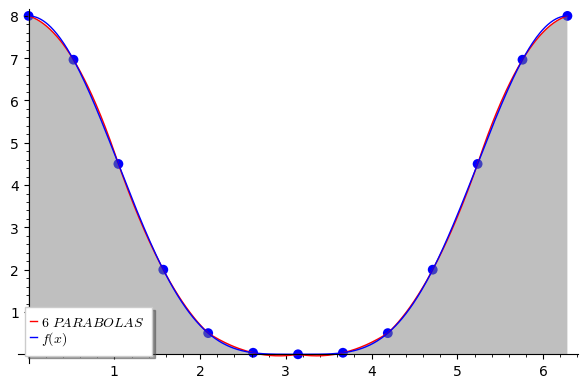

In [17]:
P=piecewise([ [ (X[2*(i-1)],X[2*i]),RR['x'].lagrange_polynomial(
[XY[2*(i-1)],XY[2*i-1],XY[2*i]]) ] for i in [1..n] ] ,var=x)
plot(P,a,b,color='red',legend_label='$6\,\,PARABOLAS$',fill=True)+plot(f,a,b,legend_label='$f(x)$')+point2d(XY,size=50)

Se invita a realizar el mismo problema pero usando el intervalo $[0,\pi]$ y multiplicar por $2$ el valor que nos de le Método de Simpson.